In [1]:
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import math
import torch

In [3]:
def summary_test(file_path, n_nodes):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(n_nodes)]
    tmp = np.array(history[0]["test_loss"])
    tmp2 = np.array(history[0]["test_acc"])
    for j in range(1, n_nodes):
        tmp += np.array(history[j]["test_loss"])
        tmp2 += np.array(history[j]["test_acc"])
    
    test_loss = tmp/n_nodes
    test_acc = tmp2/n_nodes
    
    return test_loss, test_acc

def summary_val(file_path, n_nodes):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(n_nodes)]
    tmp = np.array(history[0]["val_loss"])
    tmp2 = np.array(history[0]["val_acc"])
    for j in range(1, n_nodes):
        tmp += np.array(history[j]["val_loss"])
        tmp2 += np.array(history[j]["val_acc"])
    
    test_loss = tmp/n_nodes
    test_acc = tmp2/n_nodes
    
    return test_loss, test_acc

def summary_train(file_path, n_nodes):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(n_nodes)]
    tmp = np.array(history[0]["train_loss"])
    tmp2 = np.array(history[0]["train_acc"])
    for j in range(1, n_nodes):
        tmp += np.array(history[j]["train_loss"])
        tmp2 += np.array(history[j]["train_acc"])
    
    test_loss = tmp/n_nodes
    test_acc = tmp2/n_nodes
    
    return test_loss, test_acc

In [4]:
def search_best_lr(path, n_nodes, lr_list):
    
    best_acc = -1
    best_lr = -1
    
    for lr in lr_list:
        _, acc = summary_val(f"{path}/lr_{lr}_beta_0.9", n_nodes)
            
        #print(method, lr, acc[-1])
        if best_acc < acc[-1]:
            best_acc = acc[-1]
            best_lr = lr
    return best_lr

def average_acc(acc_list):
    avg = []
    std = []
    for i in range(len(acc_list[0])):
        avg.append(np.average([acc_list[j][i] * 100 for j in range(len(acc_list))]))
        std.append(np.std([acc_list[j][i] * 100 for j in range(len(acc_list))]))
        
    return avg, std

In [5]:
!ls ../results/cifar_vgg/node_5/0/alpha_1.0 #one_peer_deco2 #one_peer_deco/ #0/alpha_10.0/ring/

one_peer_deco  one_peer_deco2  one_peer_deco3  one_peer_exp  ring


# CIFAR-10

ring 0.0075 88.915 0.20651876428064028
one_peer_deco4 0.01 89.33444444444444 0.05593205754956285
one_peer_deco3 0.01 89.00111111111111 0.0955813918560287
one_peer_deco6 0.0075 88.8322222222222 0.1378225733629825
one_peer_exp 0.0075 89.08444444444446 0.22392679579841243


Text(0.5, 1.0, 'n=6, alpha=10.0')

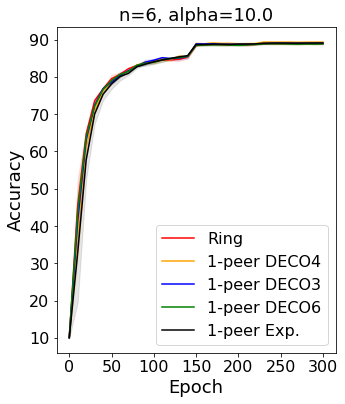

In [6]:
alpha = 10.0
n_nodes = 6
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco4", "one_peer_deco3", "one_peer_deco6", "one_peer_exp"]
labels = ["Ring", "1-peer DECO4", "1-peer DECO3", "1-peer DECO6", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,1,2]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.02,0.01,0.0075])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.0075 86.25333333333333 0.6032565942602838
one_peer_deco4 0.0075 87.62555555555555 0.20649335624382578
one_peer_deco3 0.0075 87.51222222222223 0.3246232384066
one_peer_deco6 0.0075 87.78555555555556 0.4780696782728909
one_peer_exp 0.0075 87.50777777777778 0.36295171940256776


Text(0.5, 1.0, 'n=6, alpha=1.0')

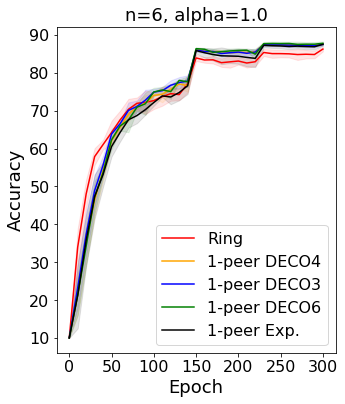

In [7]:
alpha = 1.0
n_nodes = 6
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco4", "one_peer_deco3", "one_peer_deco6", "one_peer_exp"]
labels = ["Ring", "1-peer DECO4", "1-peer DECO3", "1-peer DECO6", "1-peer Exp."]


results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,1,2]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.02,0.01,0.0075])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.0075 65.43444444444445 1.7469392987680576
one_peer_deco4 0.01 76.25555555555556 1.0308943737728633
one_peer_deco3 0.0075 77.69555555555554 1.562558048304446
one_peer_deco6 0.01 76.0088888888889 2.7714875446006517
one_peer_exp 0.0075 73.12777777777778 0.4600268376497457


Text(0.5, 1.0, 'n=6, alpha=0.1')

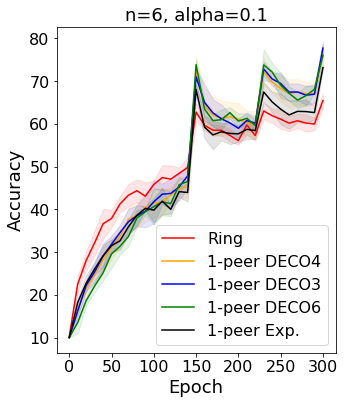

In [8]:
alpha = 0.1
n_nodes = 6
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco4", "one_peer_deco3", "one_peer_deco6", "one_peer_exp"]
labels = ["Ring", "1-peer DECO4", "1-peer DECO3", "1-peer DECO6", "1-peer Exp."]


results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,1,2]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.02,0.01,0.0075])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.005 89.28966666666666 0.11742893832252072
one_peer_adic 0.005 89.05066666666666 0.11710204476817945
one_peer_exp 0.005 89.13333333333333 0.12971078940816386


Text(0.5, 1.0, 'n=10, alpha=10.0')

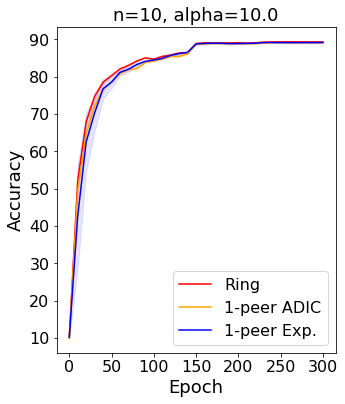

In [9]:
alpha = 10.0
n_nodes = 10
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,1,2]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01,0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.005 85.63333333333333 0.3133021261054829
one_peer_adic 0.005 87.77066666666667 0.44161622353451596
one_peer_exp 0.005 87.83933333333333 0.3282116525793824


Text(0.5, 1.0, 'n=10, alpha=1.0')

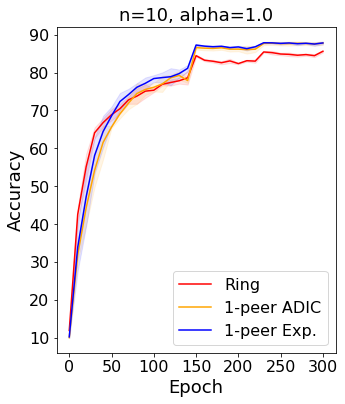

In [10]:
alpha = 1.0
n_nodes = 10
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,1,2]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01,0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.01 67.913 2.427235601804377
one_peer_adic 0.005 81.006 1.3062077425381704
one_peer_exp 0.005 78.68966666666667 2.2407561719701348


Text(0.5, 1.0, 'n=10, alpha=0.1')

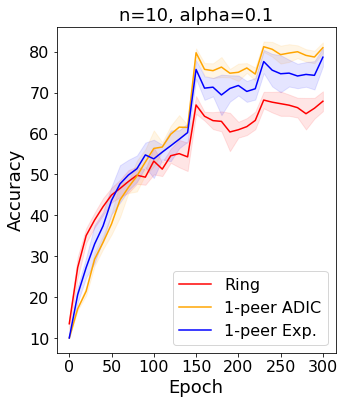

In [11]:
alpha = 0.1
n_nodes = 10
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,1,2]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01,0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.005 89.70200000000001 0.0
one_peer_adic 0.005 89.34600000000002 0.0
one_peer_exp 0.005 89.664 0.0


Text(0.5, 1.0, 'n=10, alpha=10.0')

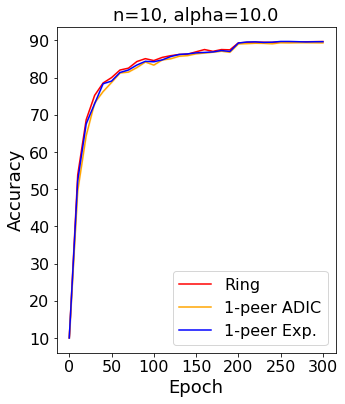

In [12]:
alpha = 10.0
n_nodes = 10
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_milestone/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01,0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_milestone/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.005 86.78399999999999 0.0
one_peer_adic 0.005 88.832 0.0
one_peer_exp 0.005 88.444 0.0


Text(0.5, 1.0, 'n=10, alpha=1.0')

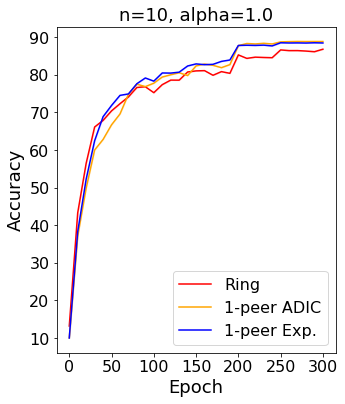

In [16]:
alpha = 1.0
n_nodes = 10
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_milestone/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01,0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_milestone/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)



ring 0.005 73.404 0.0
one_peer_adic 0.005 83.998 0.0
one_peer_exp 0.005 82.84700000000001 0.0


Text(0.5, 1.0, 'n=10, alpha=0.1')

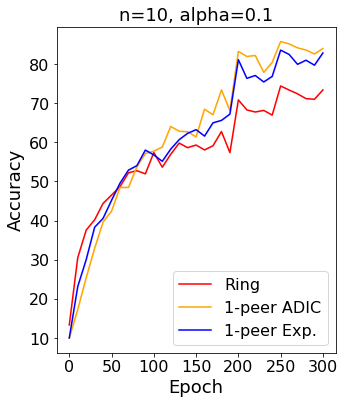

In [7]:
alpha = 0.1
n_nodes = 10
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_milestone/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01,0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_milestone/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


# Cosine

ring 0.01 89.20400000000001 0.0
one_peer_adic 0.005 88.43600000000002 0.0
one_peer_exp 0.01 89.11200000000001 0.0


Text(0.5, 1.0, 'n=15, alpha=10.0')

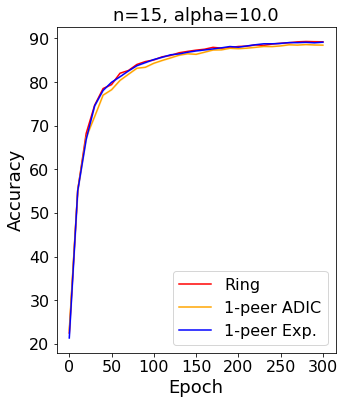

In [10]:
alpha = 10.0
n_nodes = 15
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01, 0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.01 86.12266666666666 0.09424475621525606
one_peer_adic 0.01 88.00599999999999 0.07552090708808187
one_peer_exp 0.01 87.44599999999998 0.4187275256545037


Text(0.5, 1.0, 'n=15, alpha=1.0')

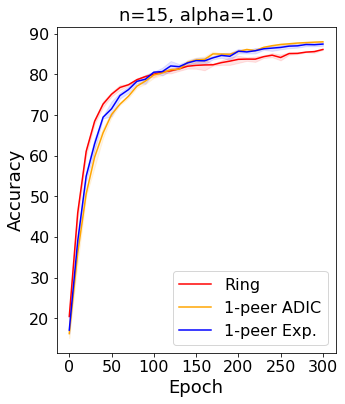

In [11]:
alpha = 1.0
n_nodes = 15
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,1,2]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01, 0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)
#plt.ylim(85, 90)

ring 0.005 71.52733333333333 0.7677212071135313
one_peer_adic 0.01 82.92377777777779 0.9110752838484296
one_peer_exp 0.01 79.30533333333334 0.8846093090340064


Text(0.5, 1.0, 'n=15, alpha=0.1')

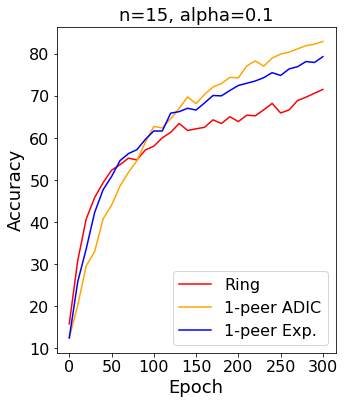

In [9]:
alpha = 0.1
n_nodes = 15
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []
    loss_list = []

    for seed in [0,1,2]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01, 0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)
        loss_list.append(loss)
        
    avg, std = average_acc(acc_list)
    loss_avg, _ = average_acc(loss_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    #plt.plot([i*10 for i in range(len(acc))], loss_avg, label=label, color=color, alpha=1.0)
    #plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)

#plt.ylim(60, 90)
#plt.xlim(240, 310)

exp 0.01 88.49033333333333 0.4610000000000056
four_peer_adic 0.01 88.61166666666665 0.08166666666667055


Text(0.5, 1.0, 'n=15, alpha=1.0')

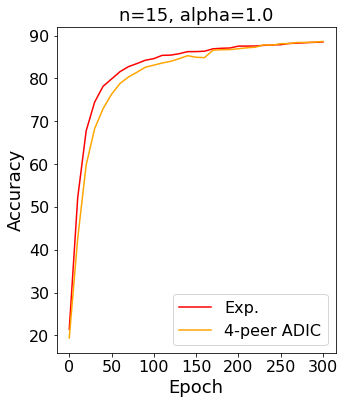

In [9]:
alpha = 1.0
n_nodes = 15
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["exp", "four_peer_adic"]
labels = ["Exp.", "4-peer ADIC"]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []
    loss_list = []

    for seed in [0,1]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01, 0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)
        loss_list.append(loss)
        
    avg, std = average_acc(acc_list)
    loss_avg, _ = average_acc(loss_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    #plt.plot([i*10 for i in range(len(acc))], loss_avg, label=label, color=color, alpha=1.0)
    #plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)

#plt.ylim(80, 90)
#plt.xlim(240, 310)

# Shuffleは必要なのか

ring 0.005 71.52733333333333 0.7677212071135313
one_peer_adic 0.01 82.92377777777779 0.9110752838484296
one_peer_adic_wo_shuffle 0.01 81.968 1.1064298274011477
one_peer_exp 0.01 79.30533333333334 0.8846093090340064


Text(0.5, 1.0, 'n=15, alpha=0.1')

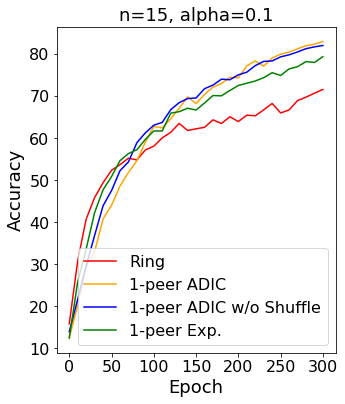

In [6]:
alpha = 0.1
n_nodes = 15
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_adic_wo_shuffle", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer ADIC w/o Shuffle", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []
    loss_list = []

    for seed in [0,1,2]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01, 0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)
        loss_list.append(loss)
        
    avg, std = average_acc(acc_list)
    loss_avg, _ = average_acc(loss_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    #plt.plot([i*10 for i in range(len(acc))], loss_avg, label=label, color=color, alpha=1.0)
    #plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)

#plt.ylim(60, 90)
#plt.xlim(240, 310)

ring 0.01 86.12266666666666 0.09424475621525606
one_peer_adic 0.01 88.00599999999999 0.07552090708808187
one_peer_adic_wo_shuffle 0.01 87.93533333333335 0.0992878344716796
one_peer_exp 0.01 87.44599999999998 0.4187275256545037


Text(0.5, 1.0, 'n=15, alpha=1.0')

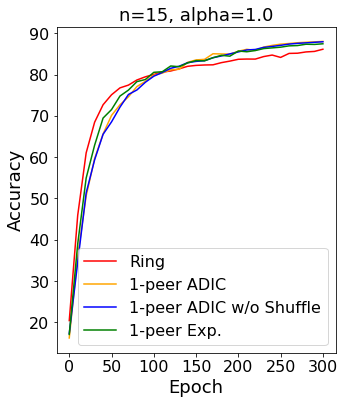

In [7]:
alpha = 1.0
n_nodes = 15
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_adic_wo_shuffle", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer ADIC w/o Shuffle", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []
    loss_list = []

    for seed in [0,1,2]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01, 0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)
        loss_list.append(loss)
        
    avg, std = average_acc(acc_list)
    loss_avg, _ = average_acc(loss_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    #plt.plot([i*10 for i in range(len(acc))], loss_avg, label=label, color=color, alpha=1.0)
    #plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)

#plt.ylim(60, 90)
#plt.xlim(240, 310)

one_peer_adic 0.005 84.32066666666667 1.26850498181477
one_peer_adic_wo_shuffle 0.005 81.91733333333333 1.656075951022646


Text(0.5, 1.0, 'n=10, alpha=0.1')

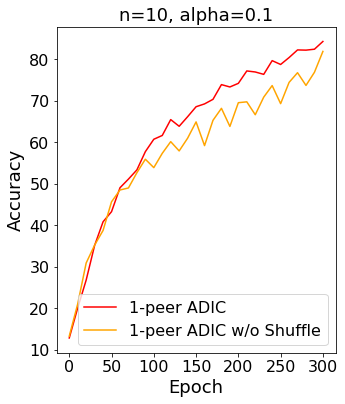

In [17]:
alpha = 0.1
n_nodes = 10
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["one_peer_adic", "one_peer_adic_wo_shuffle"]
labels = ["1-peer ADIC", "1-peer ADIC w/o Shuffle"]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []
    loss_list = []

    for seed in [0,1,2]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01, 0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)
        loss_list.append(loss)
        
    avg, std = average_acc(acc_list)
    loss_avg, _ = average_acc(loss_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    #plt.plot([i*10 for i in range(len(acc))], loss_avg, label=label, color=color, alpha=1.0)
    #plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)

#plt.ylim(60, 90)
#plt.xlim(240, 310)

one_peer_adic 0.01 88.63066666666668 0.12265217305680627
one_peer_adic_wo_shuffle 0.01 88.49933333333333 0.1732615235866071


Text(0.5, 1.0, 'n=10, alpha=1.0')

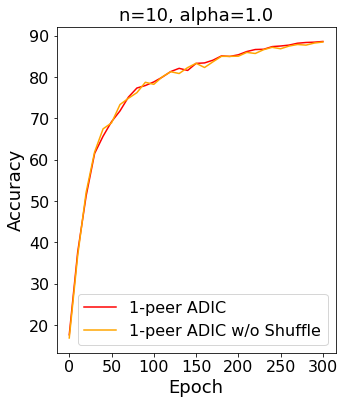

In [18]:
alpha = 1.0
n_nodes = 10
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["one_peer_adic", "one_peer_adic_wo_shuffle"]
labels = ["1-peer ADIC", "1-peer ADIC w/o Shuffle"]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []
    loss_list = []

    for seed in [0,1,2]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01, 0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)
        loss_list.append(loss)
        
    avg, std = average_acc(acc_list)
    loss_avg, _ = average_acc(loss_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    #plt.plot([i*10 for i in range(len(acc))], loss_avg, label=label, color=color, alpha=1.0)
    #plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)

#plt.ylim(60, 90)
#plt.xlim(240, 310)

# QG-DSGDm

one_peer_adic 0.005 58.53866666666667 0.0
one_peer_exp 0.005 55.94933333333334 0.0


Text(0.5, 1.0, 'n=15, alpha=0.01')

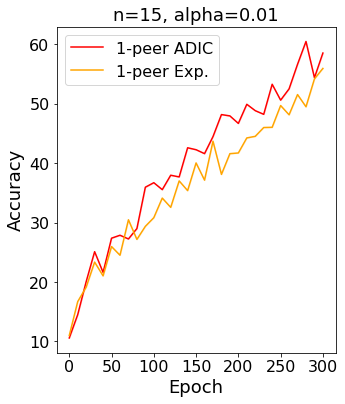

In [9]:
alpha = 0.01
n_nodes = 15
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["one_peer_adic", "one_peer_exp"]
labels = ["1-peer ADIC", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_cosine/qg_dsgdm/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_cosine/qg_dsgdm/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)
#plt.ylim(85, 90)

one_peer_adic 0.005 62.02866666666667 0.0
one_peer_exp 0.005 60.24866666666667 0.0


Text(0.5, 1.0, 'n=15, alpha=0.01')

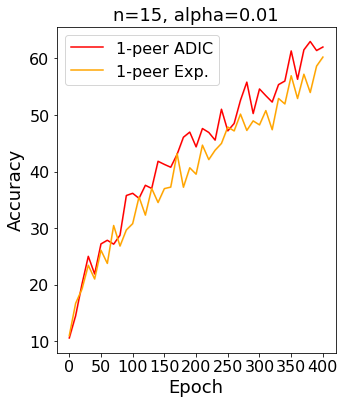

In [9]:
alpha = 0.01
n_nodes = 15
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["one_peer_adic", "one_peer_exp"]
labels = ["1-peer ADIC", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_cosine_400/qg_dsgdm/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_cosine_400/qg_dsgdm/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)
#plt.ylim(85, 90)

one_peer_adic 0.01 81.94133333333333 0.0
one_peer_exp 0.01 80.57733333333333 0.0


Text(0.5, 1.0, 'n=15, alpha=0.01')

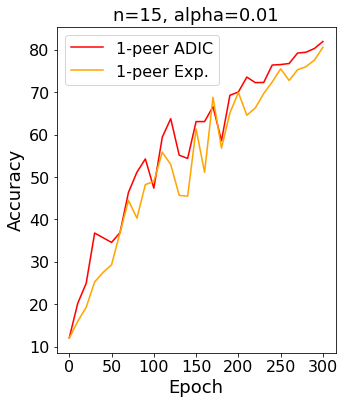

In [7]:
alpha = 0.01
n_nodes = 15
local_step = 1

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["one_peer_adic", "one_peer_exp"]
labels = ["1-peer ADIC", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_cosine/qg_dsgdm/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01,0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_cosine/qg_dsgdm/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)
#plt.ylim(85, 90)

* Local Stepがあるから、400エポックでも収束しない？
* local step =1, 2, 3にして、epoch=200ぐらいにする？

# n=8のとき
* ringがやけに悪い？

ring 0.005 58.02374999999999 0.0
one_peer_adic 0.01 78.83 0.0
one_peer_exp 0.01 76.00500000000001 0.0


Text(0.5, 1.0, 'n=8, alpha=0.1')

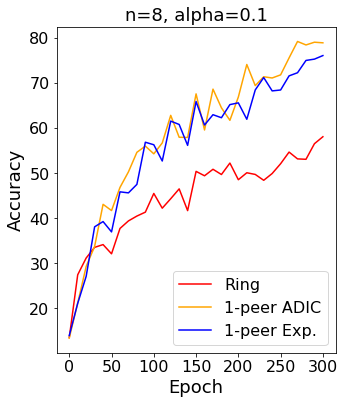

In [7]:
alpha = 0.1
n_nodes = 8
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []
    loss_list = []

    for seed in [0]:
        lr = search_best_lr(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01, 0.005])
        loss, acc = summary_test(f"../results/cifar_vgg_batch_32_cosine/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)
        loss_list.append(loss)
        
    avg, std = average_acc(acc_list)
    loss_avg, _ = average_acc(loss_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    #plt.plot([i*10 for i in range(len(acc))], loss_avg, label=label, color=color, alpha=1.0)
    #plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)

#plt.ylim(60, 90)
#plt.xlim(240, 310)

# 初期値を別にしてみる

ring 0.0075 89.60333333333334 0.09676240469812053
one_peer_deco4 0.0075 89.40222222222222 0.0873194786861732
one_peer_exp 0.0075 89.3011111111111 0.18716369015805262


Text(0.5, 1.0, 'n=6, alpha=10.0')

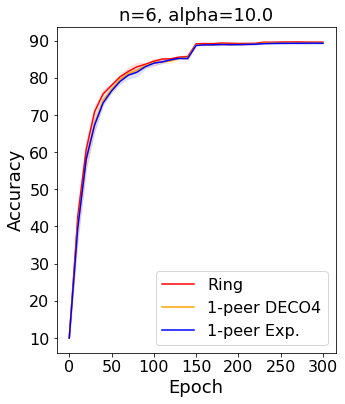

In [13]:
alpha = 10.0
n_nodes = 6
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco4", "one_peer_exp"]
labels = ["Ring", "1-peer DECO4", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,1,2]:
        lr = search_best_lr(f"../results_various_init/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.02,0.01,0.0075])
        loss, acc = summary_test(f"../results_various_init/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.0075 85.67722222222221 0.433419507101143
one_peer_deco4 0.0075 87.11777777777779 0.22081219325788853
one_peer_exp 0.0075 87.42777777777779 0.2246822172879489


Text(0.5, 1.0, 'n=6, alpha=1.0')

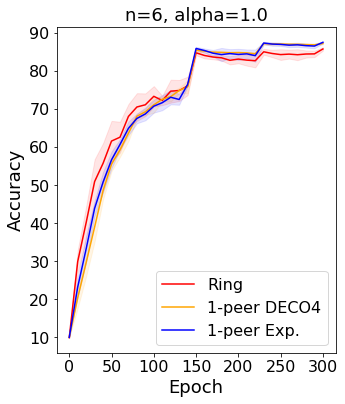

In [14]:
alpha = 1.0
n_nodes = 6
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco4", "one_peer_exp"]
labels = ["Ring", "1-peer DECO4", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,1,2]:
        lr = search_best_lr(f"../results_various_init/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.02,0.01,0.0075])
        loss, acc = summary_test(f"../results_various_init/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.0075 63.18 1.3372504959389158
one_peer_deco4 0.0075 73.06888888888888 1.9752718206444644
one_peer_exp 0.0075 67.8911111111111 0.6274615722826042


Text(0.5, 1.0, 'n=6, alpha=0.1')

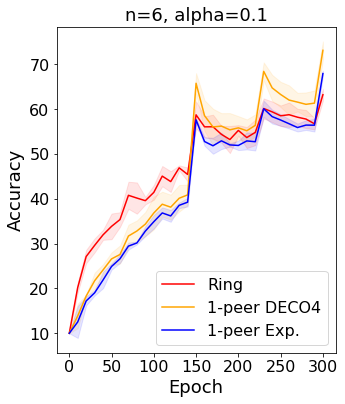

In [15]:
alpha = 0.1
n_nodes = 6
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco4", "one_peer_exp"]
labels = ["Ring", "1-peer DECO4", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,1,2]:
        lr = search_best_lr(f"../results_various_init/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.02,0.01,0.0075])
        loss, acc = summary_test(f"../results_various_init/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


# 古いやつ

ring 0.1 88.726 0.0
one_peer_deco 0.1 88.86800000000001 0.0
one_peer_deco2 0.1 88.63799999999999 0.0
one_peer_deco3 0.1 88.94999999999999 0.0
one_peer_exp 0.1 89.08200000000001 0.0


Text(0.5, 1.0, 'n=5, alpha=10.0')

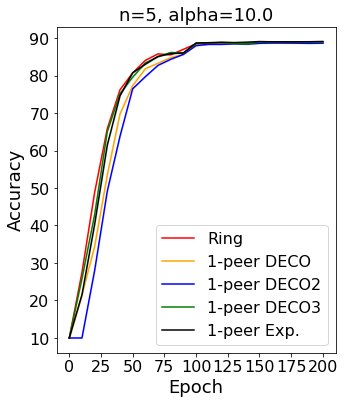

In [6]:
alpha = 10.0
n_nodes = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco", "one_peer_deco2", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring", "1-peer DECO", "1-peer DECO2", "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.1 87.148 0.0
one_peer_deco 0.1 87.83999999999999 0.0
one_peer_deco2 0.1 87.97200000000001 0.0
one_peer_deco3 0.1 88.46199999999999 0.0
one_peer_exp 0.1 88.58200000000001 0.0


Text(0.5, 1.0, 'n=5, alpha=1.0')

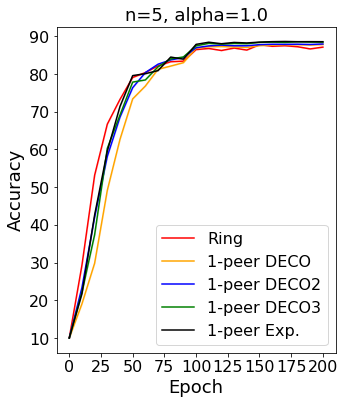

In [7]:
alpha = 1.0
n_nodes = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco", "one_peer_deco2", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring", "1-peer DECO", "1-peer DECO2", "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.1 63.32 0.0
one_peer_deco 0.05 80.784 0.0
one_peer_deco2 0.05 84.82800000000002 0.0
one_peer_deco3 0.1 85.152 0.0
one_peer_exp 0.1 81.17000000000002 0.0


Text(0.5, 1.0, 'n=5, alpha=0.1')

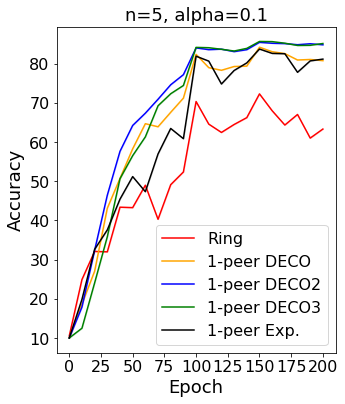

In [8]:
alpha = 0.1
n_nodes = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco", "one_peer_deco2", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring", "1-peer DECO", "1-peer DECO2", "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.05])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.1 87.89571428571429 0.0
one_peer_deco 0.1 87.46428571428572 0.0
one_peer_deco2 0.1 87.67285714285714 0.0
one_peer_deco3 0.1 88.03571428571428 0.0
one_peer_exp 0.1 87.70285714285714 0.0


Text(0.5, 1.0, 'n=7, alpha=10.0')

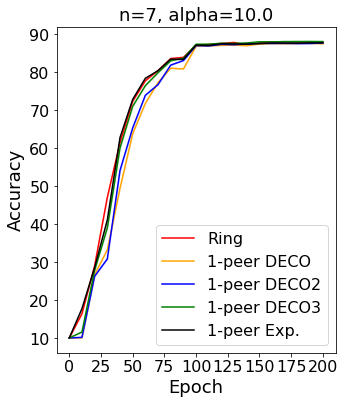

In [9]:
alpha = 10.0
n_nodes = 7

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco", "one_peer_deco2", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring", "1-peer DECO", "1-peer DECO2", "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.1 84.40857142857142 0.0
one_peer_deco 0.1 86.85285714285715 0.0
one_peer_deco2 0.1 86.4857142857143 0.0
one_peer_deco3 0.1 87.25571428571428 0.0
one_peer_exp 0.1 87.69285714285715 0.0


Text(0.5, 1.0, 'n=7, alpha=1.0')

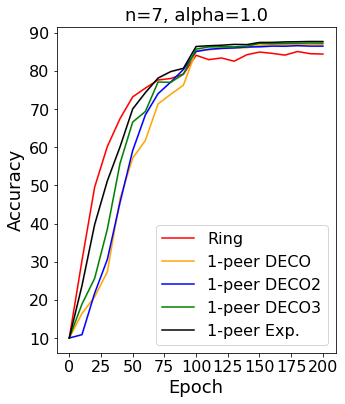

In [10]:
alpha = 1.0
n_nodes = 7

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco", "one_peer_deco2", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring", "1-peer DECO", "1-peer DECO2", "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.1 60.42857142857143 0.0
one_peer_deco 0.05 69.82714285714286 0.0
one_peer_deco2 0.05 76.6242857142857 0.0
one_peer_deco3 0.1 77.55285714285715 0.0
one_peer_exp 0.05 67.31428571428572 0.0


Text(0.5, 1.0, 'n=7, alpha=0.1')

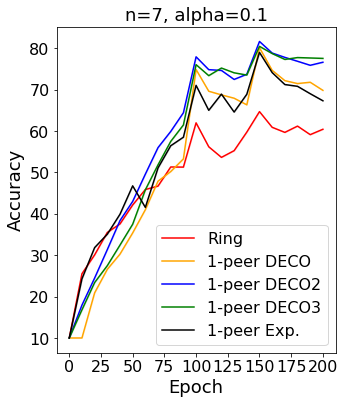

In [11]:
alpha = 0.1
n_nodes = 7

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco", "one_peer_deco2", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring", "1-peer DECO", "1-peer DECO2", "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.05])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.1 87.53625000000001 0.0
one_peer_deco 0.1 88.46750000000002 0.0
one_peer_deco2 0.1 88.46750000000002 0.0
one_peer_deco3 0.1 88.46750000000002 0.0
one_peer_exp 0.1 88.5675 0.0


Text(0.5, 1.0, 'n=8, alpha=10.0')

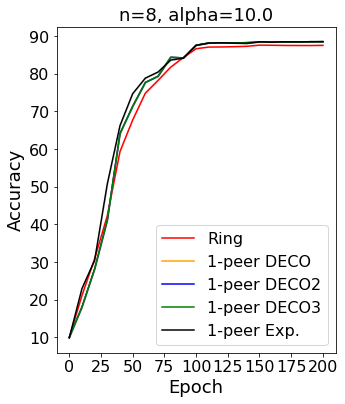

In [12]:
alpha = 10.0
n_nodes = 8

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco", "one_peer_deco2", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring", "1-peer DECO", "1-peer DECO2", "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.1 81.55624999999999 0.0
one_peer_deco 0.1 88.06 0.0
one_peer_deco2 0.1 88.06 0.0
one_peer_deco3 0.1 88.06 0.0
one_peer_exp 0.1 87.03999999999999 0.0


Text(0.5, 1.0, 'n=8, alpha=1.0')

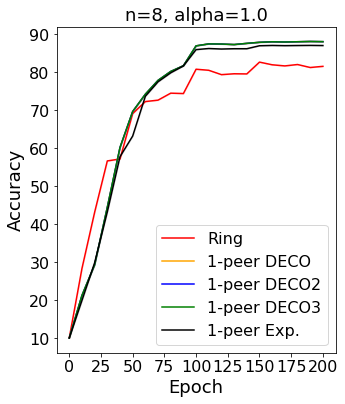

In [13]:
alpha = 1.0
n_nodes = 8

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco", "one_peer_deco2", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring", "1-peer DECO", "1-peer DECO2", "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.01 89.11857142857144 0.0
one_peer_deco3 0.01 88.77 0.0
one_peer_exp 0.01 89.06428571428572 0.0


Text(0.5, 1.0, 'n=7, alpha=10.0, K=5')

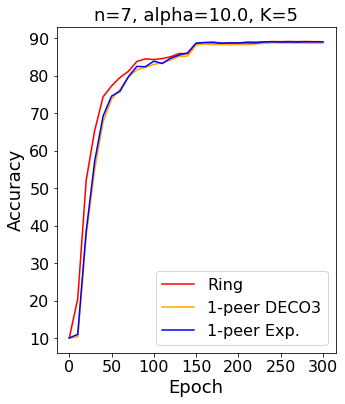

In [14]:
alpha = 10.0
n_nodes = 7
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring",  "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.05, 0.01])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}, K={local_step}", fontsize=18)


ring 0.01 86.63714285714285 0.0
one_peer_deco3 0.01 87.02714285714285 0.0
one_peer_exp 0.01 87.71714285714286 0.0


Text(0.5, 1.0, 'n=7, alpha=1.0')

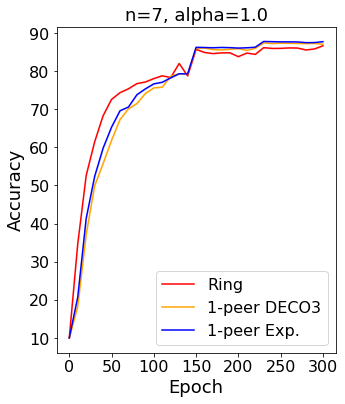

In [15]:
alpha = 1.0
n_nodes = 7
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring",  "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.05, 0.01])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)

#plt.ylim(80, 90)

ring 0.01 66.19857142857143 0.0
one_peer_deco3 0.01 72.18285714285715 0.0
one_peer_exp 0.01 73.08142857142857 0.0


Text(0.5, 1.0, 'n=7, alpha=0.1, K=5')

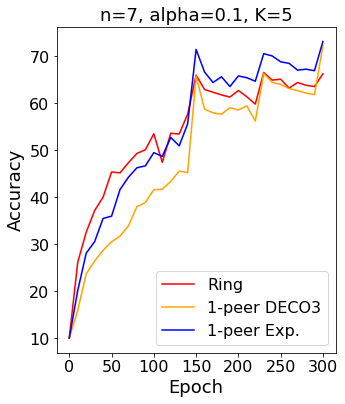

In [16]:
alpha = 0.1
n_nodes = 7
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring",  "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.05, 0.01])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}, K={local_step}", fontsize=18)


ring 0.01 86.63714285714285 0.0
one_peer_deco3 0.01 87.02714285714285 0.0
one_peer_deco4 0.01 87.13428571428572 0.0
one_peer_exp 0.01 87.71714285714286 0.0


(80.0, 90.0)

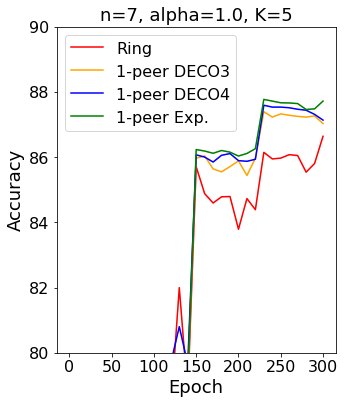

In [23]:
alpha = 1.0
n_nodes = 7
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco3", "one_peer_deco4", "one_peer_exp"]
labels = ["Ring", "1-peer DECO3","1-peer DECO4", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}, K={local_step}", fontsize=18)

plt.ylim(80, 90)

ring 0.01 89.11857142857144 0.0
one_peer_deco3 0.01 88.77 0.0
one_peer_deco4 0.01 88.52571428571429 0.0
one_peer_exp 0.01 89.06428571428572 0.0


Text(0.5, 1.0, 'n=7, alpha=10.0, K=5')

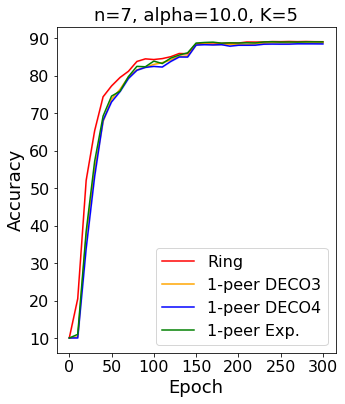

In [46]:
alpha = 10.0
n_nodes = 7
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco3", "one_peer_deco4", "one_peer_exp"]
labels = ["Ring", "1-peer DECO3","1-peer DECO4", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []
    loss_list = []
    
    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)
        loss_list.append(loss)
            
    avg, std = average_acc(acc_list)
    avg_loss, _ = average_acc(loss_list)
    
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    #plt.plot([i*10 for i in range(len(acc))], avg_loss, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}, K={local_step}", fontsize=18)

#plt.ylim(30, 50)

ring 0.01 66.19857142857143 0.0
one_peer_deco3 0.01 72.18285714285715 0.0
one_peer_deco4 0.01 70.14857142857142 0.0
one_peer_exp 0.01 73.08142857142857 0.0


Text(0.5, 1.0, 'n=7, alpha=0.1, K=5')

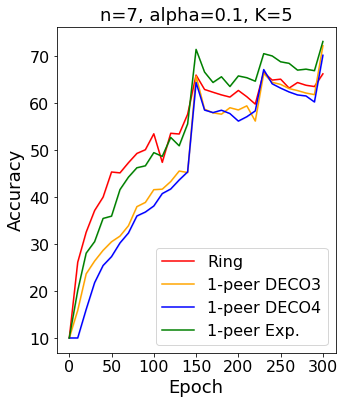

In [30]:
alpha = 0.1
n_nodes = 7
local_step = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco3", "one_peer_deco4", "one_peer_exp"]
labels = ["Ring", "1-peer DECO3","1-peer DECO4", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.01])
        loss, acc = summary_test(f"../results/cifar_vgg/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}, K={local_step}", fontsize=18)

#plt.ylim(60, 80)